## Tutorial for CSVtoRDF

https://stackoverflow.com/questions/43524943/creating-rdf-file-using-csv-file-as-input

In [1]:
from rdflib import Graph, Literal, RDF, URIRef, Namespace #basic RDF handling
from rdflib.namespace import FOAF, XSD #most common namespaces
import urllib.parse #for parsing strings to URI's
import pandas as pd

In [5]:
url='https://raw.githubusercontent.com/KRontheWeb/csv2rdf-tutorial/master/example.csv'
df=pd.read_csv(url,sep=";",quotechar='"')

In [6]:
df

,Name,Address,Place,Country,Age,Hobby,Favourite Colour
0,John,Dam 52,Amsterdam,The Netherlands,32,Fishing,Blue
1,Jenny,Leidseplein 2,Amsterdam,The Netherlands,12,Dancing,Mauve
2,Jill,52W Street 5,Amsterdam,United States of America,28,Carpentry,Cyan
3,Jake,12E Street 98,Amsterdam,United States of America,42,Ballet,Purple


In [7]:
g = Graph()
ppl = Namespace('http://example.com/people/')
loc = Namespace('http://mylocations.org/addresses/')
schema = Namespace('http://schema.org/')

In [8]:
for index, row in df.iterrows():
    g.add((URIRef(ppl+row['Name']), RDF.type, FOAF.Person))
    g.add((URIRef(ppl+row['Name']), URIRef(schema+'name'), Literal(row['Name'], datatype=XSD.string) ))
    g.add((URIRef(ppl+row['Name']), FOAF.age, Literal(row['Age'], datatype=XSD.integer) ))
    g.add((URIRef(ppl+row['Name']), URIRef(schema+'address'), Literal(row['Address'], datatype=XSD.string) ))
    g.add((URIRef(loc+urllib.parse.quote(row['Address'])), URIRef(schema+'name'), Literal(row['Address'], datatype=XSD.string) ))

In [10]:
print(g.serialize(format='turtle'))
g.serialize('example.ttl',format='turtle')

@prefix ns1: <http://xmlns.com/foaf/0.1/> .
@prefix ns2: <http://schema.org/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

<http://example.com/people/Jake> a ns1:Person ;
    ns2:address "12E Street 98"^^xsd:string ;
    ns2:name "Jake"^^xsd:string ;
    ns1:age 42 .

<http://example.com/people/Jenny> a ns1:Person ;
    ns2:address "Leidseplein 2"^^xsd:string ;
    ns2:name "Jenny"^^xsd:string ;
    ns1:age 12 .

<http://example.com/people/Jill> a ns1:Person ;
    ns2:address "52W Street 5"^^xsd:string ;
    ns2:name "Jill"^^xsd:string ;
    ns1:age 28 .

<http://example.com/people/John> a ns1:Person ;
    ns2:address "Dam 52"^^xsd:string ;
    ns2:name "John"^^xsd:string ;
    ns1:age 32 .

<http://mylocations.org/addresses/12E%20Street%2098> ns2:name "12E Street 98"^^xsd:string .

<http://mylocations.org/addresses/52W%20Street%205> ns2:name "52W Street 5"^^xsd:string .

<http://mylocations.org/addresses/Dam%2052> ns2:name "Dam 52"^^xsd:string .

<http://mylocations.org/addre

<Graph identifier=N42150f30038f4cdaa20c991a4360946a (<class 'rdflib.graph.Graph'>)>

In [3]:
from rdflib import Graph, Literal, RDF, URIRef, Namespace #basic RDF handling
from rdflib.namespace import CSVW, DC, DCAT, DCTERMS, DOAP, FOAF, ODRL2, ORG, OWL, \
                           PROF, PROV, RDF, RDFS, SDO, SH, SKOS, SOSA, SSN, TIME, \
                           VOID, XMLNS, XSD
import urllib.parse #for parsing strings to URI's
import pandas as pd
from pathlib import Path

main_path = Path().absolute().parent
data_path = main_path / 'data'

In [137]:
# full
df = pd.read_csv(data_path / 'AccountRDF.csv', encoding='utf-8')
ns_acc = Namespace('http://fsqa.com/acc#')
namespace_dict = {
    'acc': ns_acc, 'time': TIME, 'rdf': RDF, 'rdfs': RDFS, 'owl': OWL, None: ''
}
g = Graph()
g.bind('rdf', RDF)
g.bind('time', TIME)
g.bind('owl', OWL)
g.bind('acc', ns_acc, override=True)
for index, row in df.iterrows():
    s_ns, s = row['subject'].split(':')
    p_ns, p = row['predicate'].split(':')
    if len(row['object'].split(':')) < 2:
        o_ns, o = None, row['object']
    else:
        o_ns, o = row['object'].split(':')
    
    if o_ns is None:
        g.add( (URIRef(namespace_dict[s_ns]+s), URIRef(namespace_dict[p_ns]+p), Literal(o, datatype=XSD.string)) )
    else:
        g.add( (URIRef(namespace_dict[s_ns]+s), URIRef(namespace_dict[p_ns]+p), URIRef(namespace_dict[o_ns]+o)) )

In [138]:
g.serialize(data_path / 'AccountRDF.ttl', format='turtle')
g.serialize(data_path / 'AccountRDF.xml', format='xml', encoding='utf-8')

<Graph identifier=Na72b615b0229458f8802af51c7d8ce19 (<class 'rdflib.graph.Graph'>)>

In [4]:
g = Graph()
g.load(data_path / 'AccountRDF.ttl', format='ttl')

<Graph identifier=N0ebd3758f7f644ae96f4f0154c0949c2 (<class 'rdflib.graph.Graph'>)>

In [135]:
# show only BalanceSheet
query_string = """
SELECT ?p ?o
WHERE {
    acc:CostOfSales ?p ?o .
}
"""
qres = g.query(query_string)
for x in qres:
    print(f'{x}')

(rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://fsqa.com/acc#Account'))
(rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#label'), rdflib.term.Literal('매출원가', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')))
(rdflib.term.URIRef('http://fsqa.com/acc#Account_Belonging'), rdflib.term.URIRef('http://fsqa.com/acc#IncomeStatement'))
(rdflib.term.URIRef('http://fsqa.com/acc#Account_Level'), rdflib.term.Literal('5', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')))
(rdflib.term.URIRef('http://fsqa.com/acc#Account_Property'), rdflib.term.Literal('Negative', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')))
(rdflib.term.URIRef('http://fsqa.com/acc#Account_Type'), rdflib.term.Literal('Value', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')))
(rdflib.term.URIRef('http://fsqa.com/acc#numerator'), rdflib.term.URIRef('http://fsqa.com/acc#CostOfSalesRa

In [136]:
# show only BalanceSheet
query_string = """
select distinct ?literal { 
  ?s ?p ?literal 
  filter isLiteral(?literal)
}
"""
qres = g.query(query_string)
for x in qres:
    print(f'{x}')
    break

(rdflib.term.Literal('자산총계', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')),)


In [140]:
accs = list(df.loc[
    (df['object'] == 'acc:IncomeStatement') | (df['object'] == 'acc:FinancialStatement'), 
    'subject'].unique())
print(' '.join(accs))

acc:BalanceSheet acc:Revenue acc:CostOfSales acc:GrossProfit acc:SellingGeneralAdministrativeExpenses acc:OperatingIncome acc:FinanceIncome acc:FinancialExpenses acc:ProfitBeforeTax acc:IncomeTaxExpense acc:Profit acc:IncomeStatement


acc:BalanceSheet acc:Revenue acc:CostOfSales acc:GrossProfit acc:SellingGeneralAdministrativeExpenses acc:OperatingIncome acc:FinanceIncome acc:FinancialExpenses acc:ProfitBeforeTax acc:IncomeTaxExpense acc:Profit acc:IncomeStatement acc:CostOfSalesRatio acc:SellingGeneralAdministrativeRatio acc:SalesAndSellingGeneralAdministrativeRatio acc:IncomeTaxRatio acc:ProfitRatio acc:Ratios

In [141]:
accs = list(df.loc[
    (df['object'] == 'acc:BalanceSheet') | (df['object'] == 'acc:FinancialStatement'), 
    'subject'].unique())
print(' '.join(accs))

acc:CurrentAssets acc:CashAndCashEquivalents acc:TradeAndOtherCurrentReceivables acc:PrepaidExpenses acc:Inventories acc:NoncurrentAssets acc:PropertyPlantAndEquipment acc:IntangibleAssets acc:AssetsAbstract acc:CurrentLiabilities acc:TradeAndOtherCurrentPayables acc:ShorttermBorrowings acc:AdvancesCustomers acc:NoncurrentLiabilities acc:BondsIssued acc:LongTermBorrowings acc:LiabilitiesAbstract acc:TotalEquity acc:LiabilitiesAndEquities acc:BalanceSheet acc:IncomeStatement


acc:CurrentAssets acc:CashAndCashEquivalents acc:TradeAndOtherCurrentReceivables acc:PrepaidExpenses acc:Inventories acc:NoncurrentAssets acc:PropertyPlantAndEquipment acc:IntangibleAssets acc:AssetsAbstract acc:CurrentLiabilities acc:TradeAndOtherCurrentPayables acc:ShorttermBorrowings acc:AdvancesCustomers acc:NoncurrentLiabilities acc:BondsIssued acc:LongTermBorrowings acc:LiabilitiesAbstract acc:TotalEquity acc:LiabilitiesAndEquities acc:BalanceSheet acc:IncomeStatement acc:TradeReceivableTurnoverPeriod acc:InventoriesTurnoverPeriod acc:TradePayablesTurnoverPeriod acc:AdvancesCustomersTurnoverPeriod acc:Ratios acc:CalendarOneYear

In [40]:
# IncomeStatements
query_statement = """
SELECT ?s ?p ?o WHERE { 
  VALUES ?s { acc:BalanceSheet acc:Revenue acc:CostOfSales acc:GrossProfit acc:SellingGeneralAdministrativeExpenses acc:OperatingIncome acc:FinanceIncome acc:FinancialExpenses acc:ProfitBeforeTax acc:IncomeTaxExpense acc:Profit acc:IncomeStatement acc:CostOfSalesRatio acc:SellingGeneralAdministrativeRatio acc:SalesAndSellingGeneralAdministrativeRatio acc:IncomeTaxRatio acc:ProfitRatio acc:Ratios }
  VALUES ?o { acc:BalanceSheet acc:Revenue acc:CostOfSales acc:GrossProfit acc:SellingGeneralAdministrativeExpenses acc:OperatingIncome acc:FinanceIncome acc:FinancialExpenses acc:ProfitBeforeTax acc:IncomeTaxExpense acc:Profit acc:IncomeStatement acc:CostOfSalesRatio acc:SellingGeneralAdministrativeRatio acc:SalesAndSellingGeneralAdministrativeRatio acc:IncomeTaxRatio acc:ProfitRatio acc:Ratios }
  VALUES ?p { acc:partOf acc:denominator acc:numerator } 
  ?s ?p ?o .
}
"""
qres = g.query(query_statement)
list(qres)[:2]

[(rdflib.term.URIRef('http://fsqa.com/acc#Revenue'),
  rdflib.term.URIRef('http://fsqa.com/acc#partOf'),
  rdflib.term.URIRef('http://fsqa.com/acc#GrossProfit')),
 (rdflib.term.URIRef('http://fsqa.com/acc#Revenue'),
  rdflib.term.URIRef('http://fsqa.com/acc#denominator'),
  rdflib.term.URIRef('http://fsqa.com/acc#CostOfSalesRatio'))]

In [5]:
# IncomeStatements Reverse
query_statement = """
SELECT ?s ?p ?o WHERE { 
  VALUES ?s { acc:BalanceSheet acc:Revenue acc:CostOfSales acc:GrossProfit acc:SellingGeneralAdministrativeExpenses acc:OperatingIncome acc:FinanceIncome acc:FinancialExpenses acc:ProfitBeforeTax acc:IncomeTaxExpense acc:Profit acc:IncomeStatement acc:CostOfSalesRatio acc:SellingGeneralAdministrativeRatio acc:SalesAndSellingGeneralAdministrativeRatio acc:IncomeTaxRatio acc:ProfitRatio acc:Ratios }
  VALUES ?o { acc:BalanceSheet acc:Revenue acc:CostOfSales acc:GrossProfit acc:SellingGeneralAdministrativeExpenses acc:OperatingIncome acc:FinanceIncome acc:FinancialExpenses acc:ProfitBeforeTax acc:IncomeTaxExpense acc:Profit acc:IncomeStatement acc:CostOfSalesRatio acc:SellingGeneralAdministrativeRatio acc:SalesAndSellingGeneralAdministrativeRatio acc:IncomeTaxRatio acc:ProfitRatio acc:Ratios }
  VALUES ?p { acc:hasPart acc:isDenominatorOf acc:isNumeratorOf } 
  ?s ?p ?o .
}
"""
qres = g.query(query_statement)
list(qres)[:2]

[(rdflib.term.URIRef('http://fsqa.com/acc#GrossProfit'),
  rdflib.term.URIRef('http://fsqa.com/acc#hasPart'),
  rdflib.term.URIRef('http://fsqa.com/acc#Revenue')),
 (rdflib.term.URIRef('http://fsqa.com/acc#GrossProfit'),
  rdflib.term.URIRef('http://fsqa.com/acc#hasPart'),
  rdflib.term.URIRef('http://fsqa.com/acc#CostOfSales'))]

In [51]:
# BalanceSheet
query_statement = """
SELECT ?s ?p ?o WHERE { 
  VALUES ?s { acc:CurrentAssets acc:CashAndCashEquivalents acc:TradeAndOtherCurrentReceivables acc:PrepaidExpenses acc:Inventories acc:NoncurrentAssets acc:PropertyPlantAndEquipment acc:IntangibleAssets acc:AssetsAbstract acc:CurrentLiabilities acc:TradeAndOtherCurrentPayables acc:ShorttermBorrowings acc:AdvancesCustomers acc:NoncurrentLiabilities acc:BondsIssued acc:LongTermBorrowings acc:LiabilitiesAbstract acc:TotalEquity acc:LiabilitiesAndEquities acc:BalanceSheet acc:IncomeStatement acc:TradeReceivableTurnoverPeriod acc:InventoriesTurnoverPeriod acc:TradePayablesTurnoverPeriod acc:AdvancesCustomersTurnoverPeriod acc:Ratios acc:CalendarOneYear }
  VALUES ?o { acc:CurrentAssets acc:CashAndCashEquivalents acc:TradeAndOtherCurrentReceivables acc:PrepaidExpenses acc:Inventories acc:NoncurrentAssets acc:PropertyPlantAndEquipment acc:IntangibleAssets acc:AssetsAbstract acc:CurrentLiabilities acc:TradeAndOtherCurrentPayables acc:ShorttermBorrowings acc:AdvancesCustomers acc:NoncurrentLiabilities acc:BondsIssued acc:LongTermBorrowings acc:LiabilitiesAbstract acc:TotalEquity acc:LiabilitiesAndEquities acc:BalanceSheet acc:IncomeStatement acc:TradeReceivableTurnoverPeriod acc:InventoriesTurnoverPeriod acc:TradePayablesTurnoverPeriod acc:AdvancesCustomersTurnoverPeriod acc:Ratios acc:CalendarOneYear }
  VALUES ?p { acc:partOf acc:denominator acc:numerator } 
  ?s ?p ?o .
}
"""
qres = g.query(query_statement)
# list(qres)[:2]

In [ ]:
# BalanceSheet Reverse
query_statement = """
SELECT ?s ?p ?o WHERE { 
  VALUES ?s { acc:CurrentAssets acc:CashAndCashEquivalents acc:TradeAndOtherCurrentReceivables acc:PrepaidExpenses acc:Inventories acc:NoncurrentAssets acc:PropertyPlantAndEquipment acc:IntangibleAssets acc:AssetsAbstract acc:CurrentLiabilities acc:TradeAndOtherCurrentPayables acc:ShorttermBorrowings acc:AdvancesCustomers acc:NoncurrentLiabilities acc:BondsIssued acc:LongTermBorrowings acc:LiabilitiesAbstract acc:TotalEquity acc:LiabilitiesAndEquities acc:BalanceSheet acc:IncomeStatement acc:TradeReceivableTurnoverPeriod acc:InventoriesTurnoverPeriod acc:TradePayablesTurnoverPeriod acc:AdvancesCustomersTurnoverPeriod acc:Ratios acc:CalendarOneYear }
  VALUES ?o { acc:CurrentAssets acc:CashAndCashEquivalents acc:TradeAndOtherCurrentReceivables acc:PrepaidExpenses acc:Inventories acc:NoncurrentAssets acc:PropertyPlantAndEquipment acc:IntangibleAssets acc:AssetsAbstract acc:CurrentLiabilities acc:TradeAndOtherCurrentPayables acc:ShorttermBorrowings acc:AdvancesCustomers acc:NoncurrentLiabilities acc:BondsIssued acc:LongTermBorrowings acc:LiabilitiesAbstract acc:TotalEquity acc:LiabilitiesAndEquities acc:BalanceSheet acc:IncomeStatement acc:TradeReceivableTurnoverPeriod acc:InventoriesTurnoverPeriod acc:TradePayablesTurnoverPeriod acc:AdvancesCustomersTurnoverPeriod acc:Ratios acc:CalendarOneYear }
  VALUES ?p { acc:hasPart acc:isDenominatorOf acc:isNumeratorOf } 
  ?s ?p ?o .
}
"""
qres = g.query(query_statement)
list(qres)[:2]

In [20]:
# relationship Incomstatement
query_statement = """
SELECT ?s ?p ?o WHERE { 
  VALUES ?s { acc:CashAndCashEquivalents acc:TradeAndOtherCurrentReceivables acc:PrepaidExpenses acc:PropertyPlantAndEquipment acc:NoncurrentAssets acc:CurrentAssets }
  VALUES ?o { acc:CurrentAssets acc:NoncurrentAssets acc:AssetsAbstract }
  ?s ?p ?o .
}
"""
qres = g.query(query_statement)
list(qres)[:5]

[(rdflib.term.URIRef('http://fsqa.com/acc#CashAndCashEquivalents'),
  rdflib.term.URIRef('http://fsqa.com/acc#partOf'),
  rdflib.term.URIRef('http://fsqa.com/acc#CurrentAssets')),
 (rdflib.term.URIRef('http://fsqa.com/acc#TradeAndOtherCurrentReceivables'),
  rdflib.term.URIRef('http://fsqa.com/acc#partOf'),
  rdflib.term.URIRef('http://fsqa.com/acc#CurrentAssets')),
 (rdflib.term.URIRef('http://fsqa.com/acc#PrepaidExpenses'),
  rdflib.term.URIRef('http://fsqa.com/acc#partOf'),
  rdflib.term.URIRef('http://fsqa.com/acc#CurrentAssets')),
 (rdflib.term.URIRef('http://fsqa.com/acc#PropertyPlantAndEquipment'),
  rdflib.term.URIRef('http://fsqa.com/acc#partOf'),
  rdflib.term.URIRef('http://fsqa.com/acc#NoncurrentAssets')),
 (rdflib.term.URIRef('http://fsqa.com/acc#NoncurrentAssets'),
  rdflib.term.URIRef('http://fsqa.com/acc#partOf'),
  rdflib.term.URIRef('http://fsqa.com/acc#AssetsAbstract'))]

In [20]:
# 'What is the cost of revenue ratio in last year?'
query_statement = """
SELECT ?s ?p ?o WHERE { 
  ?s rdf:type acc:Account .
  VALUES ?o { acc:CostOfSalesRatio }
  VALUES ?p { acc:partOf acc:denominator acc:numerator } 
  ?s ?p ?o .
}
"""
qres = g.query(query_statement)
list(qres)

[(rdflib.term.URIRef('http://fsqa.com/acc#CostOfSales'),
  rdflib.term.URIRef('http://fsqa.com/acc#numerator'),
  rdflib.term.URIRef('http://fsqa.com/acc#CostOfSalesRatio')),
 (rdflib.term.URIRef('http://fsqa.com/acc#Revenue'),
  rdflib.term.URIRef('http://fsqa.com/acc#denominator'),
  rdflib.term.URIRef('http://fsqa.com/acc#CostOfSalesRatio'))]

In [21]:
# Construct oppsited graph  acc:denominator acc:numerator 
query_statement = """
CONSTRUCT {
  ?o ?q ?s
} 
WHERE {
  VALUES ?s { acc:BalanceSheet acc:Revenue acc:CostOfSales acc:GrossProfit acc:SellingGeneralAdministrativeExpenses acc:OperatingIncome acc:FinanceIncome acc:FinancialExpenses acc:ProfitBeforeTax acc:IncomeTaxExpense acc:Profit acc:IncomeStatement acc:CostOfSalesRatio acc:SellingGeneralAdministrativeRatio acc:SalesAndSellingGeneralAdministrativeRatio acc:IncomeTaxRatio acc:ProfitRatio }
  VALUES ?o { acc:BalanceSheet acc:Revenue acc:CostOfSales acc:GrossProfit acc:SellingGeneralAdministrativeExpenses acc:OperatingIncome acc:FinanceIncome acc:FinancialExpenses acc:ProfitBeforeTax acc:IncomeTaxExpense acc:Profit acc:IncomeStatement acc:CostOfSalesRatio acc:SellingGeneralAdministrativeRatio acc:SalesAndSellingGeneralAdministrativeRatio acc:IncomeTaxRatio acc:ProfitRatio }
  ?q a acc:InverseRelation .
  ?s (acc:hasPart|acc:denominator|acc:numerator)* ?o .
}
"""
qres = g.query(query_statement)
list(qres)[:5]

[(rdflib.term.URIRef('http://fsqa.com/acc#SellingGeneralAdministrativeRatio'),
  rdflib.term.URIRef('http://fsqa.com/acc#hasPart'),
  rdflib.term.URIRef('http://fsqa.com/acc#SellingGeneralAdministrativeExpenses')),
 (rdflib.term.URIRef('http://fsqa.com/acc#IncomeTaxRatio'),
  rdflib.term.URIRef('http://fsqa.com/acc#hasPart'),
  rdflib.term.URIRef('http://fsqa.com/acc#IncomeTaxExpense')),
 (rdflib.term.URIRef('http://fsqa.com/acc#IncomeStatement'),
  rdflib.term.URIRef('http://fsqa.com/acc#isNumeratorOf'),
  rdflib.term.URIRef('http://fsqa.com/acc#IncomeStatement')),
 (rdflib.term.URIRef('http://fsqa.com/acc#ProfitRatio'),
  rdflib.term.URIRef('http://fsqa.com/acc#hasPart'),
  rdflib.term.URIRef('http://fsqa.com/acc#Profit')),
 (rdflib.term.URIRef('http://fsqa.com/acc#IncomeTaxRatio'),
  rdflib.term.URIRef('http://fsqa.com/acc#isNumeratorOf'),
  rdflib.term.URIRef('http://fsqa.com/acc#IncomeTaxExpense'))]

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
from collections import defaultdict

In [7]:
def convert_to_string(x):
    if isinstance(x, URIRef):
        if len(x.split('#')) == 2:
            return x.split('#')[1]
        else:
            raise ValueError(f'Split error {x}')
    elif isinstance(x, Literal):
        return str(x)
    else:
        raise ValueError(f'Returned None')

df_account = pd.read_csv(data_path / 'AccountName.csv', encoding='utf-8')
ACC_DICT = defaultdict(dict)
for index, row in df_account.iterrows():
    eng = row['acc_name_eng']
    kor = row['acc_name_kor']
    group = row['group']
    ACC_DICT[eng]['name'] = kor
    ACC_DICT[eng]['group'] = group
ACC_DICT['CalendarOneYear']['name'] = '365 일'
ACC_DICT['CalendarOneYear']['group'] = 'TIME-Value-99'

query_statement = """
SELECT ?s ?p ?literal WHERE { 
?s a acc:Account . 
VALUES ?p { acc:Account_Property acc:Account_Level } 
?s ?p ?literal .
}
"""
qres2 = g.query(query_statement)
for src, link, trg in qres2:
    src = convert_to_string(src)
    link = convert_to_string(link)
    trg = convert_to_string(trg)
    ACC_DICT[src][link] = trg


In [8]:
net = Network(height="800px", width="100%", directed=True, font_color="black", heading='FSQA', notebook=False)
size_dict = {
    0: 20, 1: 18, 2: 16, 3: 14, 4: 12, 5: 10, 98: 12, 99: 10
}


for src, link, trg in qres:
    src = convert_to_string(src)
    link = convert_to_string(link)
    trg = convert_to_string(trg)

    src_label = ACC_DICT[src]['name']
    trg_label = ACC_DICT[trg]['name']
    src_fs, src_type, src_group = ACC_DICT[src]['group'].split('-')
    trg_fs, trg_type, trg_group = ACC_DICT[trg]['group'].split('-')
    src_title = f'Statement: {src_fs} Type: {src_type}'
    trg_title = f'Statement: {trg_fs} Type: {trg_type}'
    net.add_node(src, label=src, group=int(src_group), size=size_dict[int(src_group)], title=src_title)
    net.add_node(trg, label=trg, group=int(trg_group), size=size_dict[int(trg_group)], title=trg_title)
    net.add_edge(src, trg, weight=2, title=link)  # search 할때는 방향이 반대가 좋음



In [10]:
net.show('temp.html')

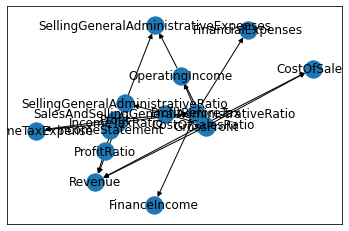

In [9]:
nx_graph = nx.DiGraph(net.get_adj_list())
nx_graph.add_edges_from([(x['from'], x['to'], {'label': x['title']}) for x in net.get_edges()])
nx.draw_networkx(nx_graph, with_labels=True)

In [83]:
bfs_tree = nx.bfs_predecessors(nx_graph, 'CostOfSalesRatio')
dict(bfs_tree)

{'CostOfSales': 'CostOfSalesRatio', 'Revenue': 'CostOfSalesRatio'}

In [13]:
ACC_DICT.keys()

dict_keys(['CurrentAssets', 'CashAndCashEquivalents', 'TradeAndOtherCurrentReceivables', 'PrepaidExpenses', 'Inventories', 'NoncurrentAssets', 'PropertyPlantAndEquipment', 'IntangibleAssets', 'AssetsAbstract', 'CurrentLiabilities', 'TradeAndOtherCurrentPayables', 'ShorttermBorrowings', 'AdvancesCustomers', 'NoncurrentLiabilities', 'BondsIssued', 'LongTermBorrowings', 'LiabilitiesAbstract', 'TotalEquity', 'LiabilitiesAndEquities', 'TradeReceivableTurnoverPeriod', 'PrepaidExpensesTurnoverPeriod', 'InventoriesTurnoverPeriod', 'TradePayablesTurnoverPeriod', 'AdvancesCustomersTurnoverPeriod', 'Revenue', 'CostOfSales', 'GrossProfit', 'SellingGeneralAdministrativeExpenses', 'OperatingIncome', 'FinanceIncome', 'FinancialExpenses', 'ProfitBeforeTax', 'IncomeTaxExpense', 'Profit', 'CostOfSalesRatio', 'SellingGeneralAdministrativeRatio', 'SalesAndSellingGeneralAdministrativeRatio', 'IncomeTaxRatio', 'ProfitRatio', 'IncomeStatement', 'BalanceSheet', 'CalendarOneYear'])

In [20]:
account = 'SalesAndSellingGeneralAdministrativeRatio'
knowledge = 'IS'
account = 'CostOfSalesRatio'
bfs_tree = nx.bfs_successors(nx_graph, source=account) #  CostOfSalesRatio
# dict(bfs_tree)

In [21]:
nodes = set()
for k, v in dict(bfs_tree).items():
    for a in v:
        nodes.add(a)
    nodes.add(k)
nodes = list(map(lambda x: f'acc:{x}', nodes))

In [30]:
nodes

['acc:Revenue', 'acc:CostOfSalesRatio', 'acc:CostOfSales']

In [31]:
# Construct oppsited graph acc:hasPart acc:isDenominatorOf acc:isNumeratorOf
query_statement = """
SELECT ?s ?p ?o WHERE { 
  ?s rdf:type acc:Account .
  VALUES ?o { """ + f'{" ".join(nodes)}' + """ }
  VALUES ?p { acc:partOf acc:denominator acc:numerator } 
  ?s ?p ?o .
}
"""
qres = g.query(query_statement)

In [32]:
list(qres)

[(rdflib.term.URIRef('http://fsqa.com/acc#CostOfSales'),
  rdflib.term.URIRef('http://fsqa.com/acc#numerator'),
  rdflib.term.URIRef('http://fsqa.com/acc#CostOfSalesRatio')),
 (rdflib.term.URIRef('http://fsqa.com/acc#Revenue'),
  rdflib.term.URIRef('http://fsqa.com/acc#denominator'),
  rdflib.term.URIRef('http://fsqa.com/acc#CostOfSalesRatio'))]

In [26]:
# partOf면 + (* 부호)
role_dict = {
    'partOf': sum,
    'numerator': 0,
    'denominator': 1 
}

for src, link, trg in qres:
    src = convert_to_string(src)
    link = convert_to_string(link)
    trg = convert_to_string(trg)
    
    src_fs, src_type, src_group = ACC_DICT[src]['group'].split('-')
    trg_fs, trg_type, trg_group = ACC_DICT[trg]['group'].split('-')
    
    
    break


In [28]:
ACC_DICT[src]

{'name': '수익(매출액)',
 'group': 'IS-Value-5',
 'Account_Property': 'Positive',
 'Account_Level': '5'}

In [27]:
src_fs, src_type, src_group

('IS', 'Value', '5')

In [25]:
src, link, trg

('CostOfSales', 'numerator', 'CostOfSalesRatio')

In [19]:
import psycopg
from psycopg import sql

In [ ]:
'({}, {}, {}, {}, {}, {}) VALUES (DEFAULT, %s, %s, %s, %s, %s) '

In [ ]:
"""
SELECT CAST(A.revenue AS REAL) / CAST(B.cor AS REAL)
FROM (
(SELECT T.value AS revenue FROM vt_is_005930 AS T
WHERE 
    T.bsns_year = '2019' AND 
    T.quarter = '4Q' AND 
    T.account = 'Revenue') AS A
JOIN 
(SELECT T.value AS cor FROM vt_is_005930 AS T
WHERE 
    T.bsns_year = '2019' AND 
    T.quarter = '4Q' AND 
    T.account = 'CostOfSales') AS B ON 1=1
)
"""

In [ ]:
sql.SQL("SELECT {}({}, {}, {}, {}, {}, {}) VALUES (DEFAULT, %s, %s, %s, %s, %s) ;").format(
    sql.Identifier(f'vt_{knowledge.lower()}_005930'), *list(map(sql.Identifier, tables['income_statement']))
),
tuple([corp] + list(line.values))

In [ ]:
"""
SELECT T.bsns_year, T.quarter, T.value FROM vt_is_005930 AS T
WHERE T.account = 'Revenue'
"""

In [60]:
net = Network(height="800px", width="100%", directed=True, font_color="black", heading='FSQA', notebook=False)
size_dict = {
    0: 20, 1: 18, 2: 16, 3: 14, 4: 12, 5: 10, 98: 12, 99: 10
}

for src, link, trg in qres:
    src = convert_to_string(src)
    link = convert_to_string(link)
    trg = convert_to_string(trg)

    src_label = ACC_DICT[src]['name']
    trg_label = ACC_DICT[trg]['name']
    src_fs, src_type, src_group = ACC_DICT[src]['group'].split('-')
    trg_fs, trg_type, trg_group = ACC_DICT[trg]['group'].split('-')
    src_title = f'Statement: {src_fs} Type: {src_type}'
    trg_title = f'Statement: {trg_fs} Type: {trg_type}'
    net.add_node(src, label=src, group=int(src_group), size=size_dict[int(src_group)], title=src_title)
    net.add_node(trg, label=trg, group=int(trg_group), size=size_dict[int(trg_group)], title=trg_title)
    net.add_edge(src, trg, weight=2, title=link)  # search 할때는 방향이 반대가 좋음
net.show('temp.html')


In [ ]:
query_format = """
SELECT 
FROM
"""

In [85]:
class Warpper():
    def __init__(self, net):
        # if adj empty means have no requirements
        self.adj_list = net.adj_list()

    def getSQL(self):
        
        

{'CostOfSales', 'Revenue'}

In [34]:
x = """acc:BalanceSheet acc:Revenue acc:CostOfSales acc:GrossProfit acc:SellingGeneralAdministrativeExpenses 
acc:OperatingIncome acc:FinanceIncome acc:FinancialExpenses acc:ProfitBeforeTax acc:IncomeTaxExpense 
acc:Profit acc:IncomeStatement acc:CostOfSalesRatio acc:SellingGeneralAdministrativeRatio 
acc:SalesAndSellingGeneralAdministrativeRatio acc:IncomeTaxRatio acc:ProfitRatio acc:Ratios
""".splitlines()
x2 = """acc:CurrentAssets acc:CashAndCashEquivalents acc:TradeAndOtherCurrentReceivables 
acc:PrepaidExpenses acc:Inventories acc:NoncurrentAssets acc:PropertyPlantAndEquipment 
acc:IntangibleAssets acc:AssetsAbstract acc:CurrentLiabilities acc:TradeAndOtherCurrentPayables 
acc:ShorttermBorrowings acc:AdvancesCustomers acc:NoncurrentLiabilities acc:BondsIssued acc:LongTermBorrowings 
acc:LiabilitiesAbstract acc:TotalEquity acc:LiabilitiesAndEquities acc:BalanceSheet acc:IncomeStatement 
acc:TradeReceivableTurnoverPeriod acc:InventoriesTurnoverPeriod acc:TradePayablesTurnoverPeriod 
acc:AdvancesCustomersTurnoverPeriod acc:Ratios acc:CalendarOneYear
""".splitlines()
acc_is = []
acc_bs = [] 
for a in x:
    acc_is.extend(a.strip().split(' '))
for a in x2:
    acc_bs.extend(a.strip().split(' '))

In [96]:
query_statement = """
SELECT ?s ?p ?literal WHERE { 
  ?s a acc:Account . 
  VALUES ?p { acc:Account_Type acc:Account_Level } 
  ?s ?p ?literal .
}
"""
qres = g.query(query_statement)
# list(qres)[:2]

In [93]:
for src, link, trg in qres:
    src = convert_to_string(src)
    link = convert_to_string(link)
    trg = convert_to_string(trg)
    break

In [95]:
src, trg, link

('BalanceSheet', 'Value', 'Account_Type')

In [89]:
ACC_DICT

defaultdict(dict,
            {'CurrentAssets': {'name': '유동자산', 'group': 'BS-Value-3'},
             'CashAndCashEquivalents': {'name': '현금및현금성자산',
              'group': 'BS-Value-4'},
             'TradeAndOtherCurrentReceivables': {'name': '매출채권',
              'group': 'BS-Value-4'},
             'PrepaidExpenses': {'name': '선급비용', 'group': 'BS-Value-4'},
             'Inventories': {'name': '재고자산', 'group': 'BS-Value-4'},
             'NoncurrentAssets': {'name': '비유동자산', 'group': 'BS-Value-3'},
             'PropertyPlantAndEquipment': {'name': '유형자산',
              'group': 'BS-Value-4'},
             'IntangibleAssets': {'name': '무형자산', 'group': 'BS-Value-4'},
             'AssetsAbstract': {'name': '자산총계', 'group': 'BS-Value-1'},
             'CurrentLiabilities': {'name': '유동부채', 'group': 'BS-Value-3'},
             'TradeAndOtherCurrentPayables': {'name': '매입채무 및 기타유동채무',
              'group': 'BS-Value-4'},
             'ShorttermBorrowings': {'name': '단기차입금', 'group': 'B